## Naive SLERP

In [ ]:
!slerp_merge \
yedi-hu/slerp_llama_2_child-2-6-float16 \
yedi-hu/Llama-2-7b-truthfulqa-float16 \
./slerp_llama_2_child-3-2-float16

config.json: 100% 698/698 [00:00<00:00, 5.90MB/s]
model.safetensors.index.json: 24.0kB [00:00, 83.9MB/s]
Fetching 3 files:   0% 0/3 [00:00<?, ?it/s]
model-00001-of-00003.safetensors:   0% 0.00/4.94G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0% 0.00/3.59G [00:00<?, ?B/s]


model-00002-of-00003.safetensors:   0% 0.00/4.95G [00:00<?, ?B/s]
model-00001-of-00003.safetensors:   0% 10.5M/4.94G [00:00<00:49, 99.4MB/s]

model-00003-of-00003.safetensors:   0% 10.5M/3.59G [00:00<00:40, 88.5MB/s]


model-00002-of-00003.safetensors:   0% 10.5M/4.95G [00:00<01:07, 72.9MB/s]
model-00001-of-00003.safetensors:   1% 41.9M/4.94G [00:00<00:27, 180MB/s] 

model-00003-of-00003.safetensors:   1% 41.9M/3.59G [00:00<00:20, 174MB/s] 


model-00002-of-00003.safetensors:   1% 31.5M/4.95G [00:00<00:37, 131MB/s] 
model-00001-of-00003.safetensors:   1% 73.4M/4.94G [00:00<00:22, 216MB/s]

model-00003-of-00003.safetensors:   2% 73.4M/3.59G [00:00<00:16, 210MB/s]
model-00001-of-00003.safetensors:   2% 105M/4

In [ ]:
from huggingface_hub import HfApi
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = 'slerp_llama_2_child-3-2-float16' # @param {"type":"string"}
repo_name=f'yedi-hu/{model_name}'
model_path=f'./{model_name}'
token='yours'

api = HfApi()

try:
    api.create_repo(
        repo_id=repo_name,
        private=False,
        exist_ok=True
      )
except Exception as e:
      raise Exception(f"Failed to create repository: {str(e)}")

print(f"Uploading model to {repo_name}...")

  # Load the model and tokenizer
# model = AutoModelForCausalLM.from_pretrained(model_path)
# tokenizer = AutoTokenizer.from_pretrained(model_path)

api.upload_folder(
    folder_path=model_path,
    repo_id=repo_name,
    repo_type="model",
    commit_message="Upload model files",
)


print(f"✅ Model successfully uploaded to: https://huggingface.co/{repo_name}")

Uploading model to yedi-hu/slerp_llama_2_child-3-2-float16...


Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.59G [00:00<?, ?B/s]

✅ Model successfully uploaded to: https://huggingface.co/yedi-hu/slerp_llama_2_child-3-2-float16


## Llama-2

In [ ]:
import pandas as pd

df = pd.read_csv('./llama2_4tasks_deltas_gen_1.csv')
print(df.keys())

for index, row in df.iterrows():
  parent = row['parent']
  child = row['child']
  print(f"Parent: {parent}, Child: {child}")


Index(['delta_norm', 'parent', 'child', 'change_winogrande', 'change_gsm8k',
       'change_mmlu', 'change_truthfulqa', 'change_average'],
      dtype='object')
Parent: yedi-hu/Llama-2-7b-gsm8k-float16, Child: yedi-hu/slerp_llama_2_child-1-6-float16
Parent: yedi-hu/Llama-2-7b-mmlu-float16, Child: yedi-hu/slerp_llama_2_child-1-3-float16
Parent: yedi-hu/Llama-2-7b-winogrande-float16, Child: yedi-hu/slerp_llama_2_child-1-5-float16
Parent: yedi-hu/Llama-2-7b-gsm8k-float16, Child: yedi-hu/slerp_llama_2_child-1-4-float16
Parent: yedi-hu/Llama-2-7b-gsm8k-float16, Child: yedi-hu/slerp_llama_2_child-1-1-float16
Parent: yedi-hu/Llama-2-7b-mmlu-float16, Child: yedi-hu/slerp_llama_2_child-1-2-float16
Parent: yedi-hu/Llama-2-7b-mmlu-float16, Child: yedi-hu/slerp_llama_2_child-1-4-float16
Parent: yedi-hu/Llama-2-7b-winogrande-float16, Child: yedi-hu/slerp_llama_2_child-1-2-float16
Parent: yedi-hu/Llama-2-7b-winogrande-float16, Child: yedi-hu/slerp_llama_2_child-1-1-float16
Parent: yedi-hu/Llama-2-7b

In [ ]:
import os

if not os.path.exists('./llama2_4tasks_deltas_gen_1_chunks_10/'):
    os.makedirs('./llama2_4tasks_deltas_gen_1_chunks_10/')
i=0
for index, row in df.iterrows():
  # if i >= 10:
  #   break
  if i < 10:
    i+=1
    continue
  parent = row['parent']
  child = row['child']
  delta_addr = './llama2_4tasks_deltas_gen_1_chunks_10/' + 'merge_norm_' + str(i)
  !crop {parent} {child} {delta_addr} -n -s 10
  i+=1
  print(f"Parent: {parent}, Child: {child}, Delta: {delta_addr}")

Loading weights from model A: yedi-hu/Llama-2-7b-truthfulqa-float16
Loading checkpoint shards: 100% 3/3 [00:03<00:00,  1.17s/it]
Loading weights from model B: yedi-hu/slerp_llama_2_child-1-5-float16
Loading checkpoint shards: 100% 3/3 [00:03<00:00,  1.16s/it]
Calculating and cropping deltas...
Processing model.embed_tokens.weight
Processing model.layers.0.self_attn.q_proj.weight
Processing model.layers.0.self_attn.k_proj.weight
Processing model.layers.0.self_attn.v_proj.weight
Processing model.layers.0.self_attn.o_proj.weight
Processing model.layers.0.mlp.gate_proj.weight
Processing model.layers.0.mlp.up_proj.weight
Processing model.layers.0.mlp.down_proj.weight
Processing model.layers.0.input_layernorm.weight
Processing model.layers.0.post_attention_layernorm.weight
Processing model.layers.1.self_attn.q_proj.weight
Processing model.layers.1.self_attn.k_proj.weight
Processing model.layers.1.self_attn.v_proj.weight
Processing model.layers.1.self_attn.o_proj.weight
Processing model.layer

In [ ]:
user = 'yedi-hu/'
repo_name = user+'llama2_4tasks_deltas_gen_1_chunks_100'
output_path = './llama2_4tasks_deltas_gen_1_chunks_10/'
try:
  api.create_repo(
      repo_id=repo_name,
      private=False,
      exist_ok=True
    )
except Exception as e:
    raise Exception(f"Failed to create repository: {str(e)}")

print(f"Uploading model to {repo_name}...")


api.upload_folder(
    folder_path=output_path,
    repo_id=repo_name,
    repo_type="model",
    commit_message="Upload model files",
)

Uploading model to yedi-hu/llama2_4tasks_deltas_gen_1_chunks_100...


merge_norm_11:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_10:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_2:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_0:   0%|          | 0.00/171k [00:00<?, ?B/s]

Upload 12 LFS files:   0%|          | 0/12 [00:00<?, ?it/s]

merge_norm_1:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_3:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_4:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_5:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_6:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_7:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_8:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_9:   0%|          | 0.00/171k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/yedi-hu/llama2_4tasks_deltas_gen_1_chunks_100/commit/5b3b24d918d61d61bbe846835da63174a84301df', commit_message='Upload model files', commit_description='', oid='5b3b24d918d61d61bbe846835da63174a84301df', pr_url=None, repo_url=RepoUrl('https://huggingface.co/yedi-hu/llama2_4tasks_deltas_gen_1_chunks_100', endpoint='https://huggingface.co', repo_type='model', repo_id='yedi-hu/llama2_4tasks_deltas_gen_1_chunks_100'), pr_revision=None, pr_num=None)

In [ ]:
import torch
t = torch.load('./llama2_4tasks_deltas/merge_norm_10')
print(t.keys())
print(t['model.layers.0.self_attn.k_proj.weight'])

dict_keys(['model.embed_tokens.weight', 'model.layers.0.self_attn.q_proj.weight', 'model.layers.0.self_attn.k_proj.weight', 'model.layers.0.self_attn.v_proj.weight', 'model.layers.0.self_attn.o_proj.weight', 'model.layers.0.mlp.gate_proj.weight', 'model.layers.0.mlp.up_proj.weight', 'model.layers.0.mlp.down_proj.weight', 'model.layers.0.input_layernorm.weight', 'model.layers.0.post_attention_layernorm.weight', 'model.layers.1.self_attn.q_proj.weight', 'model.layers.1.self_attn.k_proj.weight', 'model.layers.1.self_attn.v_proj.weight', 'model.layers.1.self_attn.o_proj.weight', 'model.layers.1.mlp.gate_proj.weight', 'model.layers.1.mlp.up_proj.weight', 'model.layers.1.mlp.down_proj.weight', 'model.layers.1.input_layernorm.weight', 'model.layers.1.post_attention_layernorm.weight', 'model.layers.2.self_attn.q_proj.weight', 'model.layers.2.self_attn.k_proj.weight', 'model.layers.2.self_attn.v_proj.weight', 'model.layers.2.self_attn.o_proj.weight', 'model.layers.2.mlp.gate_proj.weight', 'mode

## GPT-2

In [ ]:
import pandas as pd

df = pd.read_csv('./gpt2_glue_deltas.csv')
print(df.keys())

for index, row in df.iterrows():
  parent = row['parent']
  child = row['child']
  print(f"Parent: {parent}, Child: {child}")


Index(['parent', 'child', 'change_cola', 'change_mnli', 'change_mrpc',
       'change_qnli', 'change_qqp', 'change_rte', 'change_sst-2',
       'change_average'],
      dtype='object')
Parent: tanganke/gpt2_cola, Child: yedi-hu/slerp_gpt2_cola_gpt2_mnli_0
Parent: tanganke/gpt2_mnli, Child: yedi-hu/slerp_gpt2_cola_gpt2_mnli_0
Parent: tanganke/gpt2_mnli, Child: yedi-hu/slerp_gpt2_mnli_gpt2_mrpc_1
Parent: tanganke/gpt2_mrpc, Child: yedi-hu/slerp_gpt2_mnli_gpt2_mrpc_1
Parent: tanganke/gpt2_mrpc, Child: yedi-hu/slerp_gpt2_mrpc_gpt2_qnli_2
Parent: tanganke/gpt2_qnli, Child: yedi-hu/slerp_gpt2_mrpc_gpt2_qnli_2
Parent: tanganke/gpt2_qnli, Child: yedi-hu/slerp_gpt2_qnli_gpt2_qqp_3
Parent: tanganke/gpt2_qqp, Child: yedi-hu/slerp_gpt2_qnli_gpt2_qqp_3
Parent: tanganke/gpt2_qqp, Child: yedi-hu/slerp_gpt2_qqp_gpt2_rte_4
Parent: tanganke/gpt2_rte, Child: yedi-hu/slerp_gpt2_qqp_gpt2_rte_4
Parent: tanganke/gpt2_rte, Child: yedi-hu/slerp_gpt2_rte_gpt2_sst2_5
Parent: tanganke/gpt2_sst2, Child: yedi-hu/sl

In [ ]:
import os

if not os.path.exists('./gpt2_glue_merge_deltas/'):
    os.makedirs('./gpt2_glue_merge_deltas/')
i=0
for index, row in df.iterrows():
  parent = row['parent']
  child = row['child']
  delta_addr = './gpt2_glue_merge_deltas/' + 'merge_' + str(i)
  !crop {parent} {child} {delta_addr}
  i+=1
  print(f"Parent: {parent}, Child: {child}, Delta: {delta_addr}")

Loading weights from model A: tanganke/gpt2_cola
2025-06-17 09:38:41.807669: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750153121.866598    2777 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750153121.885373    2777 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-17 09:38:41.952288: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Loading weights from model B: yedi-hu/slerp_gpt2_cola_gpt2_mnli_0
Calculatin

In [ ]:
user = 'yedi-hu/'
repo_name = user+'gpt2_glue_merge_deltas'
output_path = './gpt2_glue_merge_deltas/'
try:
  api.create_repo(
      repo_id=repo_name,
      private=False,
      exist_ok=True
    )
except Exception as e:
    raise Exception(f"Failed to create repository: {str(e)}")

print(f"Uploading model to {repo_name}...")


api.upload_folder(
    folder_path=output_path,
    repo_id=repo_name,
    repo_type="model",
    commit_message="Upload model files",
)

Uploading model to yedi-hu/gpt2_glue_merge_deltas...


merge_2:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_1:   0%|          | 0.00/652M [00:00<?, ?B/s]

Upload 12 LFS files:   0%|          | 0/12 [00:00<?, ?it/s]

merge_0:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_11:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_10:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_3:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_4:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_5:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_6:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_7:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_8:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_9:   0%|          | 0.00/652M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/yedi-hu/gpt2_glue_merge_deltas/commit/4020d2dfd207ff8a178242caa24d048ade56dd20', commit_message='Upload model files', commit_description='', oid='4020d2dfd207ff8a178242caa24d048ade56dd20', pr_url=None, repo_url=RepoUrl('https://huggingface.co/yedi-hu/gpt2_glue_merge_deltas', endpoint='https://huggingface.co', repo_type='model', repo_id='yedi-hu/gpt2_glue_merge_deltas'), pr_revision=None, pr_num=None)

## Task Region Localization (Deltas)

In [ ]:
from huggingface_hub import snapshot_download
local_path = snapshot_download(repo_id="yedi-hu/gpt2_glue_merge_deltas",
                repo_type="model",
                local_dir_use_symlinks=False,
                local_dir="/content/gpt2_glue_merge_deltas/")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:980: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/2.05k [00:00<?, ?B/s]

merge_2:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_1:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_3:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_11:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_10:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_4:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_0:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_5:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_8:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_6:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_7:   0%|          | 0.00/652M [00:00<?, ?B/s]

merge_9:   0%|          | 0.00/652M [00:00<?, ?B/s]

In [ ]:
import torch
import os
DATA_DIR = "./gpt2_glue_merge_deltas"
delta = torch.load(os.path.join(DATA_DIR, 'merge_1'))
i = 0
for key in delta.keys():
  print(key)
  i+=1
print(f'number of modules: {i}')

transformer.wte.weight
transformer.wpe.weight
transformer.h.0.ln_1.weight
transformer.h.0.ln_1.bias
transformer.h.0.attn.c_attn.weight
transformer.h.0.attn.c_attn.bias
transformer.h.0.attn.c_proj.weight
transformer.h.0.attn.c_proj.bias
transformer.h.0.ln_2.weight
transformer.h.0.ln_2.bias
transformer.h.0.mlp.c_fc.weight
transformer.h.0.mlp.c_fc.bias
transformer.h.0.mlp.c_proj.weight
transformer.h.0.mlp.c_proj.bias
transformer.h.1.ln_1.weight
transformer.h.1.ln_1.bias
transformer.h.1.attn.c_attn.weight
transformer.h.1.attn.c_attn.bias
transformer.h.1.attn.c_proj.weight
transformer.h.1.attn.c_proj.bias
transformer.h.1.ln_2.weight
transformer.h.1.ln_2.bias
transformer.h.1.mlp.c_fc.weight
transformer.h.1.mlp.c_fc.bias
transformer.h.1.mlp.c_proj.weight
transformer.h.1.mlp.c_proj.bias
transformer.h.2.ln_1.weight
transformer.h.2.ln_1.bias
transformer.h.2.attn.c_attn.weight
transformer.h.2.attn.c_attn.bias
transformer.h.2.attn.c_proj.weight
transformer.h.2.attn.c_proj.bias
transformer.h.2.ln_2

In [ ]:
import os
import torch
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.exceptions import ConvergenceWarning
import warnings

# --- reproducibility ---
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# --- configs ---
DATA_DIR = "./gpt2_glue_merge_deltas"
METRIC_CSV = "./gpt2_glue_merges_deltas/gpt2_glue_deltas.csv"
USE_ELASTICNET = True
ALPHA_LIST = np.logspace(-4, 0, 20)

# For optional stability selection
REPEAT_SELECTION = True
N_REPEATS = 100
SELECTION_THRESHOLD = 50
MANUAL_ALPHA = 1e-3
L1_RATIO = 0.7


# --- extract features ---
def extract_features_and_labels(data_dir, metric_csv, task):
    metric_table = pd.read_csv(metric_csv)
    metric_map = dict(zip(metric_table["delta"], metric_table[task]))

    feature_names_set = set()
    raw_data = []

    for fname in os.listdir(data_dir):
        match_keys = [k for k in metric_map if fname in k or k.endswith(fname)]
        if not match_keys:
            print(f"Warning: Cannot match {fname} to any child name in CSV, skipping.")
            continue

        child_name = match_keys[0]
        delta_metric = metric_map[child_name]

        delta = torch.load(os.path.join(data_dir, fname))

        feature_dict = {
            key: tensor.norm().item()
            for key, tensor in delta.items()
            if isinstance(tensor, torch.Tensor) and tensor.numel() > 0
        }
        feature_names_set.update(feature_dict.keys())
        raw_data.append((feature_dict, delta_metric))

    feature_names = sorted(feature_names_set)
    X, y = [], []

    for feature_dict, delta_metric in raw_data:
        x = [feature_dict.get(k, 0.0) for k in feature_names]
        X.append(x)
        y.append(delta_metric)

    return np.array(X), np.array(y), feature_names


# --- generate mask dictionary from selection ---
def generate_mask_dict(feature_names, selected_mask):
    return {name: bool(mask) for name, mask in zip(feature_names, selected_mask)}


# --- train ---
def train_and_interpret(X, y, feature_names, task):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    rng = check_random_state(SEED)

    if REPEAT_SELECTION:
        print(f"[Info] Using repeated ElasticNet selection over {N_REPEATS} bootstraps")
        selection_counts = np.zeros(len(feature_names))

        for _ in range(N_REPEATS):
            idx = rng.choice(len(X), len(X), replace=True)
            X_sample, y_sample = X_scaled[idx], y[idx]

            model = ElasticNet(alpha=MANUAL_ALPHA, l1_ratio=L1_RATIO, max_iter=10000)
            model.fit(X_sample, y_sample)

            selection_counts += (model.coef_ != 0)

        selected_mask = selection_counts >= SELECTION_THRESHOLD
        coef = selection_counts  # for plotting
    else:
        if USE_ELASTICNET:
            model = ElasticNetCV(
                cv=5, alphas=ALPHA_LIST, l1_ratio=0.5,
                max_iter=10000, random_state=rng
            ).fit(X_scaled, y)
        else:
            model = LassoCV(
                cv=5, alphas=ALPHA_LIST,
                max_iter=10000, random_state=rng
            ).fit(X_scaled, y)

        coef = model.coef_
        selected_mask = coef != 0

    selected_features = np.array(feature_names)[selected_mask]
    selected_importance = coef[selected_mask]

    # --- visualization ---
    plt.figure(figsize=(10, 4))
    plt.bar(np.arange(len(selected_importance)), selected_importance)
    plt.xticks(np.arange(len(selected_importance)), selected_features, rotation=90, fontsize=8)
    plt.title(f"Feature Importance for {task}")
    plt.tight_layout()
    plt.savefig(f"feature_importance_{task}.png")
    plt.show()

    # --- save mask dict ---
    mask_dict = generate_mask_dict(feature_names, selected_mask)
    torch.save(mask_dict, f"parameter_mask_{task}.pt")
    print(f"[Info] Saved parameter mask to parameter_mask_{task}.pt")

    return selected_features, selected_importance


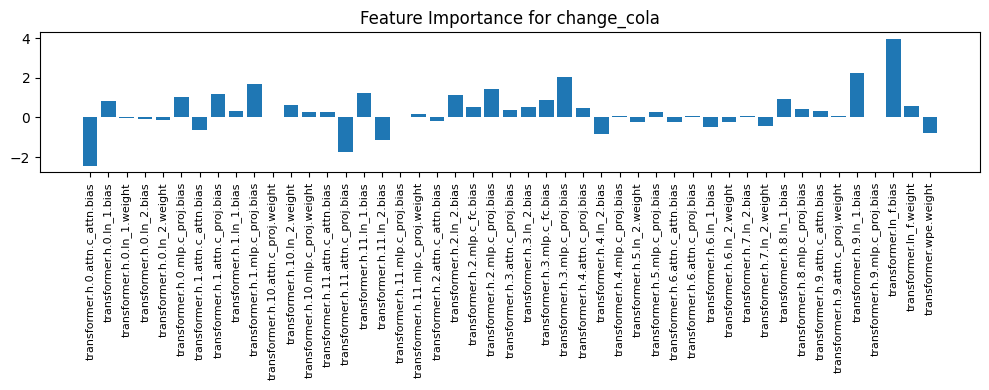

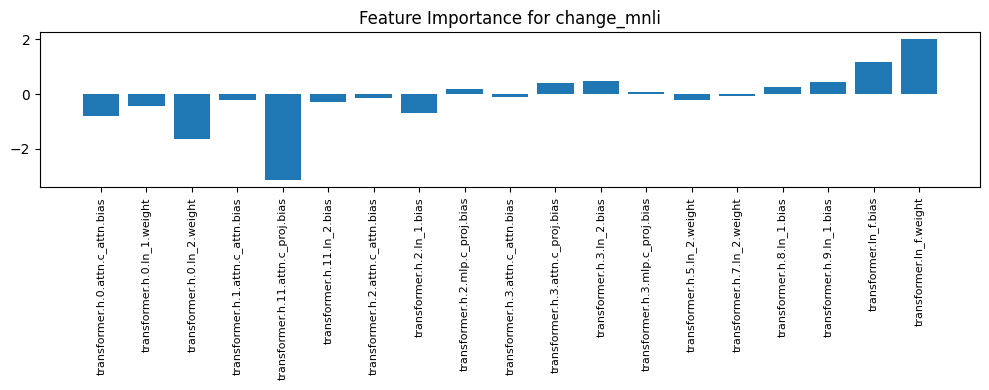

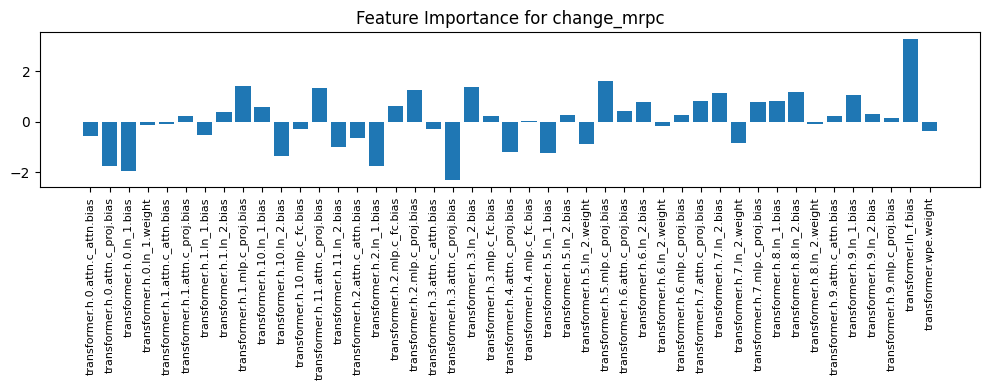

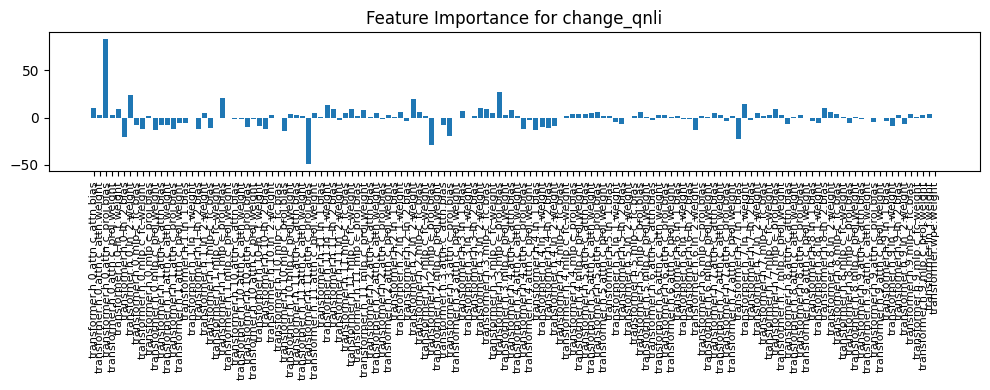

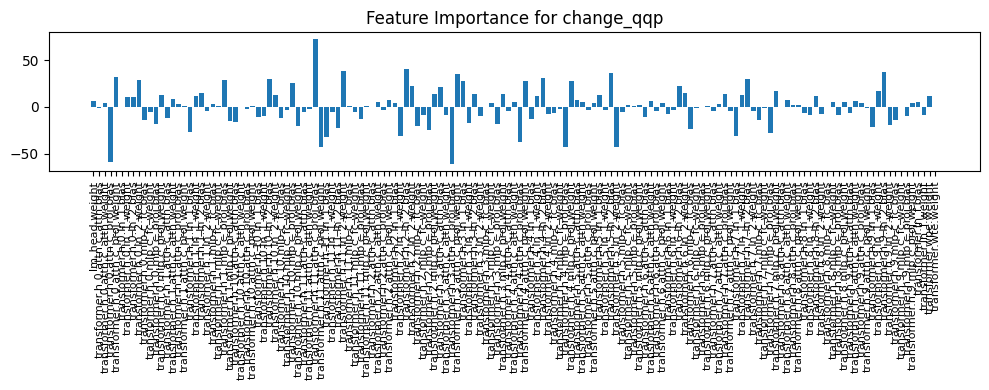

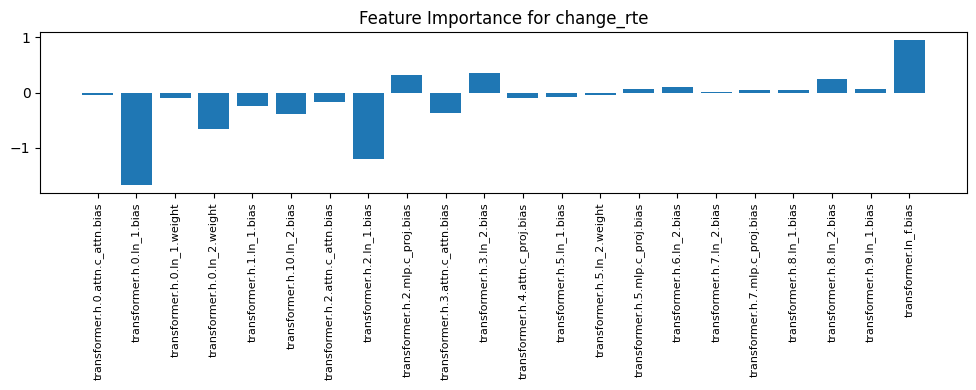

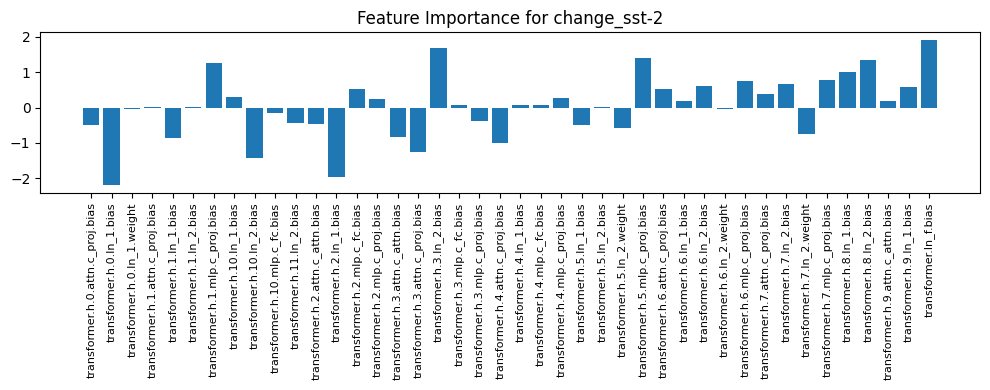

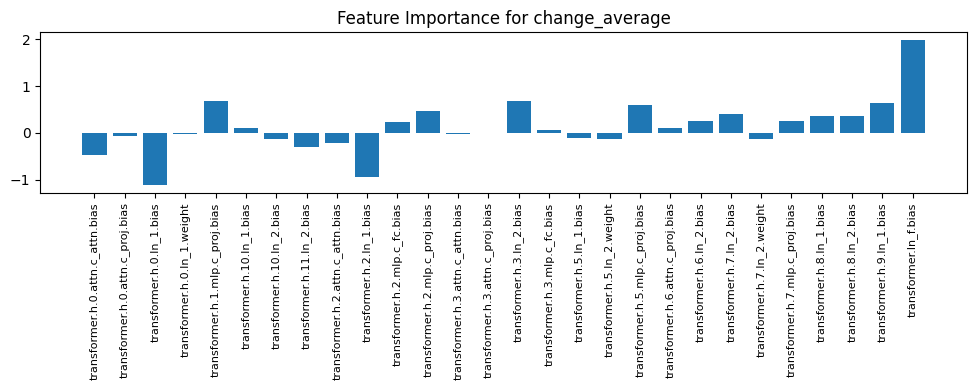

In [ ]:
metric_table = pd.read_csv(METRIC_CSV)
all_tasks = [col for col in metric_table.columns if col.startswith("change_")]
task_features_list = {}

# --- main ---
for task in all_tasks:
  X, y, feature_names = extract_features_and_labels(DATA_DIR, METRIC_CSV, task)
  selected_features, selected_importance = train_and_interpret(X, y, feature_names, task)
  task_features_list[task] = (selected_features, selected_importance)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import pandas as pd
import numpy as np

all_features = sorted({feat for task_feats, _ in task_features_list.values() for feat in task_feats})

task_weight_vectors = {}
for task, (feats, imps) in task_features_list.items():
    weight_vec = np.zeros(len(all_features))
    for f, imp in zip(feats, imps):
        idx = all_features.index(f)
        weight_vec[idx] = imp
    task_weight_vectors[task] = weight_vec

def jaccard_similarity(a, b):
    return len(set(a) & set(b)) / len(set(a) | set(b))

jaccard_matrix = pd.DataFrame(index=task_features_list.keys(), columns=task_features_list.keys())
for task1 in task_features_list:
    for task2 in task_features_list:
        f1, _ = task_features_list[task1]
        f2, _ = task_features_list[task2]
        jaccard_matrix.loc[task1, task2] = jaccard_similarity(f1, f2)

print("Jaccard Similarity Matrix:")
print(jaccard_matrix.astype(float).round(3))


task_names = list(task_weight_vectors.keys())
weight_matrix = np.stack([task_weight_vectors[task] for task in task_names])
cosine_sim_matrix = cosine_similarity(weight_matrix)

cosine_matrix_df = pd.DataFrame(cosine_sim_matrix, index=task_names, columns=task_names)
print("\nCosine Similarity Matrix:")
print(cosine_matrix_df.round(3))


Jaccard Similarity Matrix:
                change_cola  change_mnli  change_mrpc  change_qnli  \
change_cola           1.000        0.347        0.438        0.312   
change_mnli           0.347        1.000        0.333        0.129   
change_mrpc           0.438        0.333        1.000        0.289   
change_qnli           0.312        0.129        0.289        1.000   
change_qqp            0.315        0.128        0.302        0.926   
change_rte            0.278        0.414        0.457        0.143   
change_sst-2          0.413        0.298        0.776        0.277   
change_average        0.339        0.424        0.622        0.177   

                change_qqp  change_rte  change_sst-2  change_average  
change_cola          0.315       0.278         0.413           0.339  
change_mnli          0.128       0.414         0.298           0.424  
change_mrpc          0.302       0.457         0.776           0.622  
change_qnli          0.926       0.143         0.277      

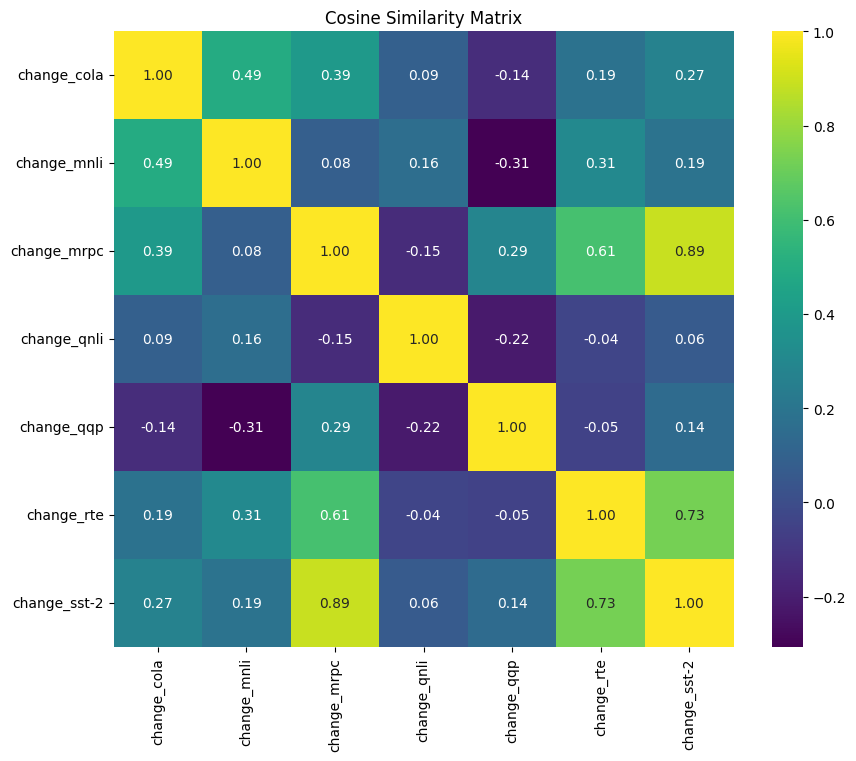

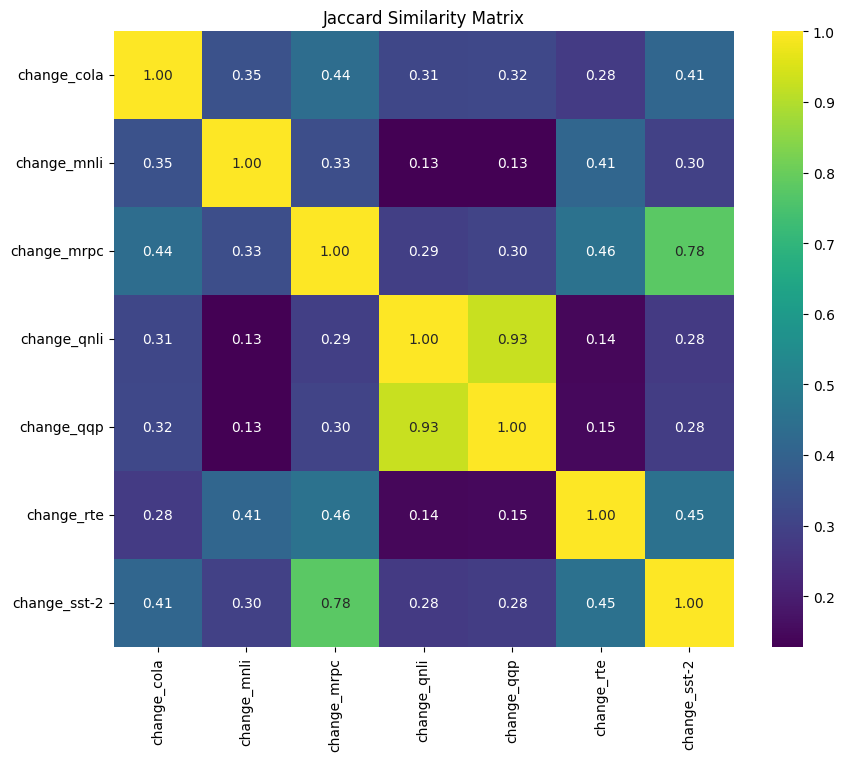

In [ ]:
# prompt: visualize two matrix and remove change_average

import matplotlib.pyplot as plt
import seaborn as sns

tasks_to_visualize = [task for task in task_names if task != "change_average"]

# Filter the cosine similarity matrix
cosine_matrix_filtered = cosine_matrix_df.loc[tasks_to_visualize, tasks_to_visualize]

# Visualize the Cosine Similarity Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_matrix_filtered.astype(float), annot=True, fmt=".2f", cmap="viridis")
plt.title("Cosine Similarity Matrix")
plt.show()


# Filter the Jaccard similarity matrix
jaccard_matrix_filtered = jaccard_matrix.loc[tasks_to_visualize, tasks_to_visualize]

# Visualize the Jaccard Similarity Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_matrix_filtered.astype(float), annot=True, fmt=".2f", cmap="viridis")
plt.title("Jaccard Similarity Matrix")
plt.show()


In [ ]:
import torch
from typing import Dict, Optional
import logging

logger = logging.getLogger(__name__)

def generate_task_mask(
    task_name: str,
    task_features_list: Dict[str, tuple],
    base_model_path: str,
    save_path: Optional[str] = None,
    top_percentile: float = 0.25  # NEW: keep top X% important parameters
) -> Dict[str, torch.Tensor]:
    """
    Generate a boolean mask for a specific task based on top-percentile of important parameter names.

    Args:
        task_name (str): Name of the task (e.g., "change_cola")
        task_features_list (Dict[str, tuple]): Mapping from task name to (selected feature names, importance values)
        base_model_path (str): Path to the base model used to obtain parameter shapes
        save_path (Optional[str]): If specified, save the mask dict to this path
        top_percentile (float): Percentile of most important parameters to keep (e.g., 0.1 = top 10%)

    Returns:
        Dict[str, torch.Tensor]: Dictionary of boolean masks for the specified task
    """
    if task_name not in task_features_list:
        raise ValueError(f"Task '{task_name}' not found in task_features_list.")

    logger.info(f"Loading base model weights from: {base_model_path}")
    state_dict = torch.load(base_model_path, map_location="cpu")

    selected_features, importance_values = task_features_list[task_name]

    # Sort and select top percentile
    zipped = list(zip(selected_features, importance_values))
    zipped.sort(key=lambda x: -x[1])  # descending sort
    # Only keep top_p% of the whole modules
    cutoff_index = int(len(state_dict) * top_percentile)
    cutoff_index = max(1, min(cutoff_index,len(zipped)))  # at least one selected
    top_selected_features = [name for name, _ in zipped[:cutoff_index]]
    selected_features_set = set(top_selected_features)

    logger.info(f"Generating mask for task: {task_name} with top {top_percentile*100:.1f}% ({cutoff_index}) selected features.")
    mask_dict: Dict[str, torch.Tensor] = {}
    num_masked_keys = 0

    for key, tensor in state_dict.items():
        if not isinstance(tensor, torch.Tensor):
            continue

        if key in selected_features_set:
            mask = torch.ones_like(tensor, dtype=torch.bool)
            num_masked_keys += 1
        else:
            mask = torch.zeros_like(tensor, dtype=torch.bool)

        mask_dict[key] = mask

    print(f"Masked keys (with any True): {num_masked_keys} out of {len(state_dict)} parameters")

    if save_path:
        torch.save(mask_dict, save_path)
        logger.info(f"Task mask saved to: {save_path}")

    return mask_dict


In [ ]:
mask = generate_task_mask(
    task_name="change_mnli",
    task_features_list=task_features_list,
    base_model_path="gpt2_glue_merge_deltas/merge_0",
    save_path="mnli_mask"
)

Masked keys (with any True): 19 out of 149 parameters


In [ ]:
!slerp_merge \
tanganke/gpt2_cola\
tanganke/gpt2_mnli\
./slerp_gpt2_cola_gpt2_mnli_mask_25\
-m mnli_mask

INFO:methods.slerp:Loading weights from model A: tanganke/gpt2_cola
config.json: 100% 1.05k/1.05k [00:00<00:00, 4.40MB/s]
2025-06-19 12:02:31.880398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750334552.210798    6566 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750334552.301770    6566 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-19 12:02:32.995115: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
mod

In [ ]:
!replace_merge \
tanganke/gpt2_cola\
tanganke/gpt2_mnli\
mnli_mask\
./replace_gpt2_cola_gpt2_mnli_mask_25

INFO:methods.replace_merge:Loading weights from model A: tanganke/gpt2_cola
2025-06-19 12:04:03.767671: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750334643.792024    7035 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750334643.799327    7035 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-19 12:04:03.823784: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:methods.replace_merge:Loading weights from m

In [ ]:
from huggingface_hub import HfApi
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = 'replace_gpt2_cola_gpt2_mnli_mask_25' # @param {"type":"string"}'
repo_name=f'yedi-hu/{model_name}'
model_path=f'./{model_name}'
token='yours'

api = HfApi()

try:
    api.create_repo(
        repo_id=repo_name,
        private=False,
        exist_ok=True
      )
except Exception as e:
      raise Exception(f"Failed to create repository: {str(e)}")

print(f"Uploading model to {repo_name}...")

  # Load the model and tokenizer
# model = AutoModelForCausalLM.from_pretrained(model_path)
# tokenizer = AutoTokenizer.from_pretrained(model_path)

api.upload_folder(
    folder_path=model_path,
    repo_id=repo_name,
    repo_type="model",
    commit_message="Upload model files",
)


print(f"✅ Model successfully uploaded to: https://huggingface.co/{repo_name}")

## Task Region Localization (Norms)

In [ ]:
from huggingface_hub import snapshot_download
local_path = snapshot_download(repo_id="yedi-hu/llama2_4tasks_deltas_gen_1_chunks_10",
                repo_type="model",
                local_dir_use_symlinks=False,
                local_dir="/content/llama2_4tasks_deltas_gen_1_chunks_10/")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:980: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

merge_norm_11:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_3:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_2:   0%|          | 0.00/171k [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

merge_norm_0:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_1:   0%|          | 0.00/171k [00:00<?, ?B/s]

llama2_4tasks_deltas_gen_1.csv: 0.00B [00:00, ?B/s]

merge_norm_10:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_8:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_4:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_6:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_9:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_5:   0%|          | 0.00/171k [00:00<?, ?B/s]

merge_norm_7:   0%|          | 0.00/171k [00:00<?, ?B/s]

In [ ]:
import torch
import os
DATA_DIR = "./llama2_4tasks_deltas_gen_1_chunks_10"
delta = torch.load(os.path.join(DATA_DIR, 'merge_norm_0'), weights_only=False)
i = 0
for key, value in delta.items():
  print(key)
  print(value)
  i+=1
print(f'number of modules: {i}')

model.embed_tokens.weight
[np.float64(0.00014167758615890686), np.float64(0.00011527242093070475), np.float64(9.940608340445805e-05), np.float64(9.076558433301999e-05), np.float64(7.865956064277365e-05), np.float64(7.771725753810753e-05), np.float64(7.307768800227403e-05), np.float64(6.659332950442218e-05), np.float64(6.22940710748951e-05), np.float64(4.767255553666908e-05)]
model.layers.0.self_attn.q_proj.weight
[np.float64(0.0006506970659070209), np.float64(0.0006521266745260041), np.float64(0.000689216375776305), np.float64(0.0007146782378995258), np.float64(0.0005589086678282558), np.float64(0.0006617394379434685), np.float64(0.0005813010247460053), np.float64(0.0006743451713131392), np.float64(0.0006995965614898808), np.float64(0.0008305405260742164)]
model.layers.0.self_attn.k_proj.weight
[np.float64(0.0001450465395392816), np.float64(0.0001490891785313863), np.float64(0.0001538439426391709), np.float64(0.00012697804497438), np.float64(0.00015370186487634872), np.float64(0.000129

In [ ]:
import os
import torch
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, ElasticNetCV, ElasticNet, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.exceptions import ConvergenceWarning
import warnings
import joblib

# --- reproducibility ---
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# --- configs ---
DATA_DIR = "./llama2_4tasks_deltas_gen_1_chunks_10"
METRIC_CSV = "./llama2_4tasks_deltas_gen_1_chunks_10/llama2_4tasks_deltas_gen_1.csv"
USE_ELASTICNET = True
ALPHA_LIST = np.logspace(-3, 0, 20)

# For optional stability selection
REPEAT_SELECTION = True
N_REPEATS = 100
SELECTION_THRESHOLD = 70
MANUAL_ALPHA = 1e-3
L1_RATIO = 0.9


# --- extract features ---
def extract_features_and_labels(data_dir, metric_csv, task):
    metric_table = pd.read_csv(metric_csv)
    metric_map = dict(zip(metric_table["delta_norm"], metric_table[task]))

    feature_names_set = set()
    raw_data = []

    for fname in os.listdir(data_dir):
        match_keys = [k for k in metric_map if fname in k or k.endswith(fname)]
        if not match_keys:
            print(f"Warning: Cannot match {fname} to any child name in CSV, skipping.")
            continue

        child_name = match_keys[0]
        delta_metric = metric_map[child_name]

        delta = torch.load(os.path.join(data_dir, fname), weights_only=False)

        feature_dict = {}
        for key, value in delta.items():
            if isinstance(value, list):
                # Handle chunked norm list
                for i, v in enumerate(value):
                    feature_name = f"{key}[{i}]"
                    feature_dict[feature_name] = v
                    feature_names_set.add(feature_name)
            else:
                # Handle normal scalar norm
                feature_dict[key] = value
                feature_names_set.add(key)

        raw_data.append((feature_dict, delta_metric))

    feature_names = sorted(feature_names_set)
    X, y = [], []

    for feature_dict, delta_metric in raw_data:
        x = [feature_dict.get(k, 0.0) for k in feature_names]
        X.append(x)
        y.append(delta_metric)

    return np.array(X), np.array(y), feature_names


# --- generate mask dictionary from selection ---
def generate_mask_dict(feature_names, selected_mask):
    return {name: bool(mask) for name, mask in zip(feature_names, selected_mask)}

def save_checkpoint(scaler, model, feature_names, task, checkpoint_dir="./checkpoints"):
    os.makedirs(checkpoint_dir, exist_ok=True)
    scaler_path = os.path.join(checkpoint_dir, f"{task}_scaler.pkl")
    model_path = os.path.join(checkpoint_dir, f"{task}_model.pkl")
    features_path = os.path.join(checkpoint_dir, f"{task}_features.pkl")

    joblib.dump(scaler, scaler_path)
    joblib.dump(model, model_path)
    joblib.dump(feature_names, features_path)
    print(f"[Info] Saved checkpoint to {checkpoint_dir}")


def load_checkpoint(task, checkpoint_dir="./checkpoints"):
    scaler_path = os.path.join(checkpoint_dir, f"{task}_scaler.pkl")
    model_path = os.path.join(checkpoint_dir, f"{task}_model.pkl")
    features_path = os.path.join(checkpoint_dir, f"{task}_features.pkl")

    scaler = joblib.load(scaler_path)
    model = joblib.load(model_path)
    feature_names = joblib.load(features_path)

    print(f"[Info] Loaded checkpoint from {checkpoint_dir}")
    return scaler, model, feature_names


def load_checkpoint_and_extract_features(task, checkpoint_dir="./checkpoints", plot=True):
    # --- Load checkpoint ---
    scaler_path = os.path.join(checkpoint_dir, f"{task}_scaler.pkl")
    model_path = os.path.join(checkpoint_dir, f"{task}_model.pkl")
    features_path = os.path.join(checkpoint_dir, f"{task}_features.pkl")

    scaler = joblib.load(scaler_path)
    model = joblib.load(model_path)
    feature_names = joblib.load(features_path)

    # --- Extract selected features ---
    coef = model.coef_
    selected_mask = coef != 0
    selected_features = np.array(feature_names)[selected_mask]
    selected_importance = coef[selected_mask]

    # --- Optional: Plot feature importance ---
    if plot:
        plt.figure(figsize=(10, 4))
        plt.bar(np.arange(len(selected_importance)), selected_importance)
        plt.xticks(np.arange(len(selected_importance)), selected_features, rotation=90, fontsize=8)
        plt.title(f"Feature Importance for {task} (From Checkpoint)")
        plt.tight_layout()
        plt.savefig(f"feature_importance_{task}_from_checkpoint.png")
        plt.show()

    return selected_features, selected_importance

[Info] Bootstrap iteration 10/150 done.
[Info] Bootstrap iteration 20/150 done.
[Info] Bootstrap iteration 30/150 done.
[Info] Bootstrap iteration 40/150 done.
[Info] Bootstrap iteration 50/150 done.
[Info] Bootstrap iteration 60/150 done.
[Info] Bootstrap iteration 70/150 done.
[Info] Bootstrap iteration 80/150 done.
[Info] Bootstrap iteration 90/150 done.
[Info] Bootstrap iteration 100/150 done.
[Info] Bootstrap iteration 110/150 done.
[Info] Bootstrap iteration 120/150 done.
[Info] Bootstrap iteration 130/150 done.
[Info] Bootstrap iteration 140/150 done.
[Info] Bootstrap iteration 150/150 done.
[Info] Saved checkpoint to ./checkpoints
[Info] Selected 701 features out of 2910.


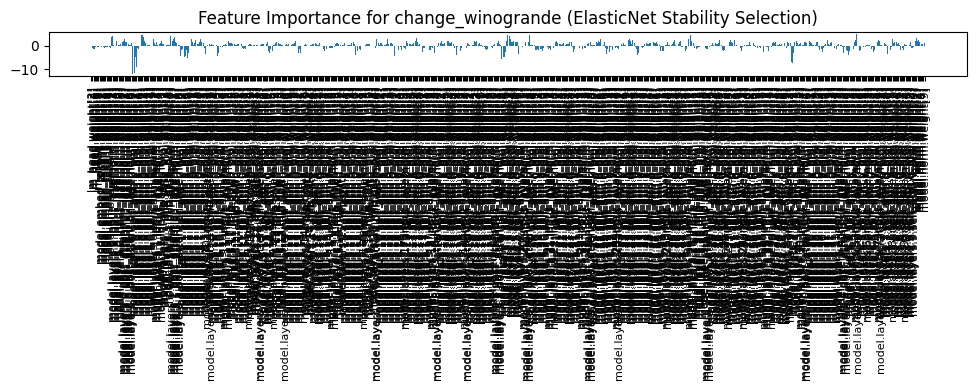

[Info] Bootstrap iteration 10/150 done.
[Info] Bootstrap iteration 20/150 done.
[Info] Bootstrap iteration 30/150 done.
[Info] Bootstrap iteration 40/150 done.
[Info] Bootstrap iteration 50/150 done.
[Info] Bootstrap iteration 60/150 done.
[Info] Bootstrap iteration 70/150 done.
[Info] Bootstrap iteration 80/150 done.
[Info] Bootstrap iteration 90/150 done.
[Info] Bootstrap iteration 100/150 done.
[Info] Bootstrap iteration 110/150 done.
[Info] Bootstrap iteration 120/150 done.
[Info] Bootstrap iteration 130/150 done.
[Info] Bootstrap iteration 140/150 done.
[Info] Bootstrap iteration 150/150 done.
[Info] Saved checkpoint to ./checkpoints
[Info] Selected 1655 features out of 2910.


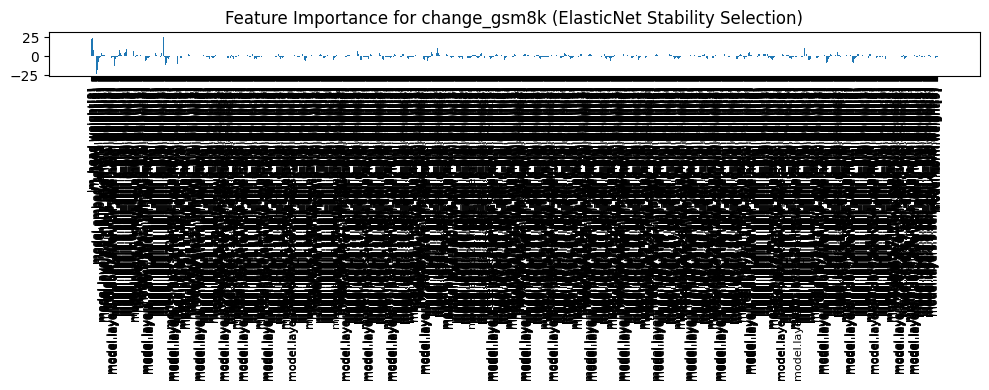

[Info] Bootstrap iteration 10/150 done.
[Info] Bootstrap iteration 20/150 done.
[Info] Bootstrap iteration 30/150 done.
[Info] Bootstrap iteration 40/150 done.
[Info] Bootstrap iteration 50/150 done.
[Info] Bootstrap iteration 60/150 done.
[Info] Bootstrap iteration 70/150 done.
[Info] Bootstrap iteration 80/150 done.
[Info] Bootstrap iteration 90/150 done.
[Info] Bootstrap iteration 100/150 done.
[Info] Bootstrap iteration 110/150 done.
[Info] Bootstrap iteration 120/150 done.
[Info] Bootstrap iteration 130/150 done.
[Info] Bootstrap iteration 140/150 done.
[Info] Bootstrap iteration 150/150 done.
[Info] Saved checkpoint to ./checkpoints
[Info] Selected 1509 features out of 2910.


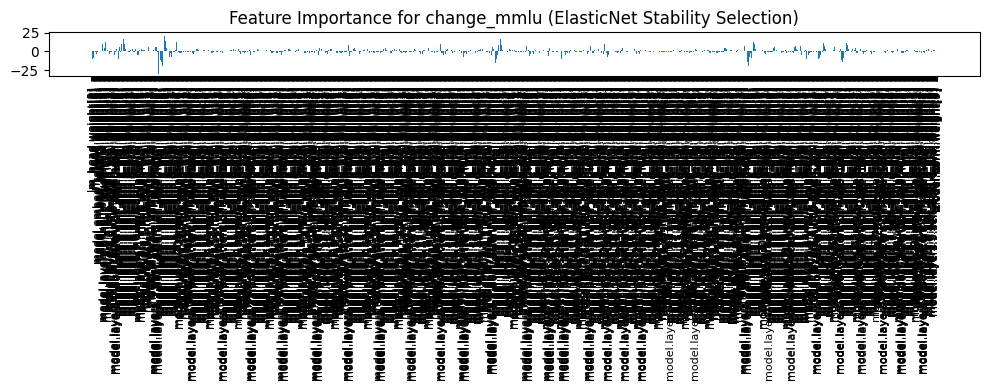

[Info] Bootstrap iteration 10/150 done.
[Info] Bootstrap iteration 20/150 done.
[Info] Bootstrap iteration 30/150 done.
[Info] Bootstrap iteration 40/150 done.
[Info] Bootstrap iteration 50/150 done.
[Info] Bootstrap iteration 60/150 done.
[Info] Bootstrap iteration 70/150 done.
[Info] Bootstrap iteration 80/150 done.
[Info] Bootstrap iteration 90/150 done.
[Info] Bootstrap iteration 100/150 done.
[Info] Bootstrap iteration 110/150 done.
[Info] Bootstrap iteration 120/150 done.
[Info] Bootstrap iteration 130/150 done.
[Info] Bootstrap iteration 140/150 done.
[Info] Bootstrap iteration 150/150 done.
[Info] Saved checkpoint to ./checkpoints
[Info] Selected 1070 features out of 2910.


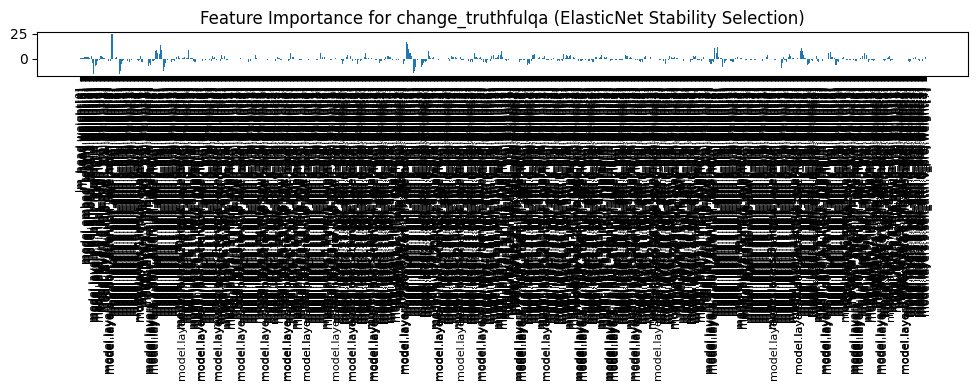

[Info] Bootstrap iteration 10/150 done.
[Info] Bootstrap iteration 20/150 done.
[Info] Bootstrap iteration 30/150 done.
[Info] Bootstrap iteration 40/150 done.
[Info] Bootstrap iteration 50/150 done.
[Info] Bootstrap iteration 60/150 done.
[Info] Bootstrap iteration 70/150 done.
[Info] Bootstrap iteration 80/150 done.
[Info] Bootstrap iteration 90/150 done.
[Info] Bootstrap iteration 100/150 done.
[Info] Bootstrap iteration 110/150 done.
[Info] Bootstrap iteration 120/150 done.
[Info] Bootstrap iteration 130/150 done.
[Info] Bootstrap iteration 140/150 done.
[Info] Bootstrap iteration 150/150 done.
[Info] Saved checkpoint to ./checkpoints
[Info] Selected 235 features out of 2910.


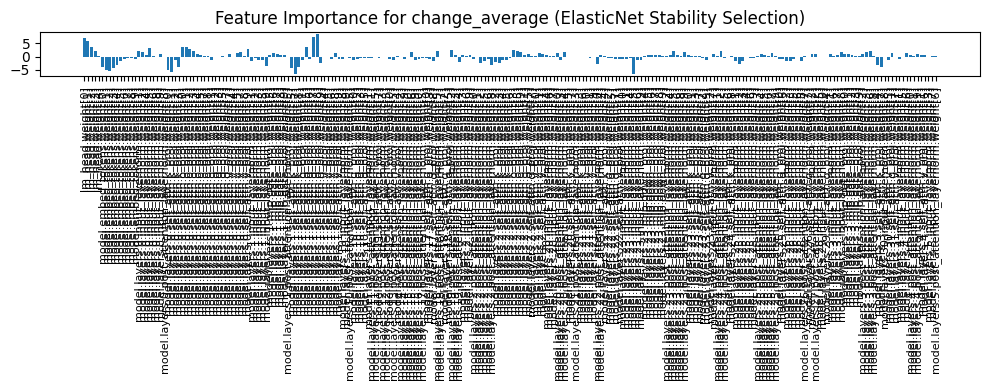

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import matplotlib.pyplot as plt


def train_and_interpret_elasticnet(X, y, feature_names, task,
                                   resume=False,
                                   checkpoint_dir="./checkpoints",
                                   n_bootstraps=150,
                                   sample_fraction=0.85,
                                   elastic_alpha=0.001,
                                   elastic_l1_ratio=0.7,
                                   selection_threshold=0.2,
                                   random_seed=42):
    """
    Feature selection via ElasticNet with stability selection.

    Parameters:
    - n_bootstraps: number of bootstrap iterations for stability selection.
    - sample_fraction: fraction of data used per bootstrap sample (usually < 1).
    - elastic_alpha: ElasticNet regularization strength.
    - elastic_l1_ratio: ElasticNet L1/L2 mixing ratio (0 = Ridge, 1 = Lasso).
    - selection_threshold: selection frequency threshold to consider a feature important (0-1).
    """

    if resume:
        scaler, model, feature_names = load_checkpoint(task, checkpoint_dir)
        X_scaled = scaler.transform(X)
        print("[Info] Continuing from checkpoint - skipping training.")
    else:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        rng = np.random.RandomState(random_seed)

        n_samples, n_features = X.shape
        selection_counts = np.zeros(n_features, dtype=int)

        # Bootstrap resampling + ElasticNet fitting
        for i in range(n_bootstraps):
            sample_idx = rng.choice(n_samples, size=int(n_samples * sample_fraction), replace=True)
            X_sample = X_scaled[sample_idx]
            y_sample = y[sample_idx]

            model = ElasticNet(alpha=elastic_alpha, l1_ratio=elastic_l1_ratio, max_iter=10000)
            model.fit(X_sample, y_sample)

            # Count how many times each feature is selected (non-zero coefficient)
            selection_counts += (model.coef_ != 0)

            if (i + 1) % 10 == 0:
                print(f"[Info] Bootstrap iteration {i + 1}/{n_bootstraps} done.")

        # Calculate feature selection frequency
        selection_freq = selection_counts / n_bootstraps
        selected_mask = selection_freq >= selection_threshold

        if np.sum(selected_mask) == 0:
            print("[Warning] No features passed stability threshold. Using all features.")
            selected_mask = np.ones(n_features, dtype=bool)

        # Final ElasticNet on selected features
        model = ElasticNet(alpha=elastic_alpha, l1_ratio=elastic_l1_ratio, max_iter=10000)
        model.fit(X_scaled[:, selected_mask], y)

        coef = np.zeros(n_features)
        coef[selected_mask] = model.coef_

        save_checkpoint(scaler, model, feature_names, task, checkpoint_dir)

    selected_features = np.array(feature_names)[coef != 0]
    print(f"[Info] Selected {len(selected_features)} features out of {len(feature_names)}.")
    selected_importance = coef[coef != 0]

    # Visualization
    plt.figure(figsize=(10, 4))
    plt.bar(np.arange(len(selected_importance)), selected_importance)
    plt.xticks(np.arange(len(selected_importance)), selected_features, rotation=90, fontsize=8)
    plt.title(f"Feature Importance for {task} (ElasticNet Stability Selection)")
    plt.tight_layout()
    plt.savefig(f"feature_importance_{task}.png")
    plt.show()

    return selected_features, selected_importance


# --- Main ---
metric_table = pd.read_csv(METRIC_CSV)
all_tasks = [col for col in metric_table.columns if col.startswith("change_")]
task_features_list = {}

for task in all_tasks:
    X, y, feature_names = extract_features_and_labels(DATA_DIR, METRIC_CSV, task)
    selected_features, selected_importance = train_and_interpret_elasticnet(X, y, feature_names, task)
    task_features_list[task] = (selected_features, selected_importance)

## Other ML methods

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def train_and_interpret_mi(X, y, feature_names, task,
                            checkpoint_dir="./checkpoints",
                            selection_threshold=0.01,
                            random_seed=42):
    """
    用 Mutual Information 选特征（稀疏 mask）

    参数说明：
    - selection_threshold: MI 值阈值（越大越稀疏）
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 计算每个特征与目标的互信息
    mi_scores = mutual_info_regression(X_scaled, y, random_state=random_seed)

    # threshold 筛选
    selected_mask = mi_scores >= selection_threshold

    if np.sum(selected_mask) == 0:
        print("[Warning] No features passed MI threshold. Using all features.")
        selected_mask = np.ones_like(mi_scores, dtype=bool)

    # 没有拟合模型，MI 只是打分
    coef = mi_scores
    coef[~selected_mask] = 0

    selected_features = np.array(feature_names)[selected_mask]
    selected_importance = coef[selected_mask]

    # --- visualization ---
    plt.figure(figsize=(10, 4))
    plt.bar(np.arange(len(selected_importance)), selected_importance)
    plt.xticks(np.arange(len(selected_importance)), selected_features, rotation=90, fontsize=8)
    plt.title(f"Feature Importance (MI) for {task}")
    plt.tight_layout()
    plt.savefig(f"feature_importance_{task}_mi.png")
    plt.show()

    # --- save mask dict ---
    mask_dict = generate_mask_dict(feature_names, coef != 0)
    torch.save(mask_dict, f"parameter_mask_{task}_mi.pt")
    print(f"[Info] Saved parameter mask to parameter_mask_{task}_mi.pt")

    return selected_features, selected_importance


# --- Main ---
metric_table = pd.read_csv(METRIC_CSV)
all_tasks = [col for col in metric_table.columns if col.startswith("change_")]
task_features_list = {}

for task in all_tasks:
    X, y, feature_names = extract_features_and_labels(DATA_DIR, METRIC_CSV, task)
    selected_features, selected_importance = train_and_interpret_mi(X, y, feature_names, task)
    task_features_list[task] = (selected_features, selected_importance)

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import StandardScaler

def hsic(X, y, sigma=1.0):

    K = rbf_kernel(X, gamma=1 / (2 * sigma ** 2))
    y = y.reshape(-1, 1)
    L = rbf_kernel(y, gamma=1 / (2 * sigma ** 2))

    n = K.shape[0]
    H = np.eye(n) - 1 / n * np.ones((n, n))
    HKH = H @ K @ H
    HLH = H @ L @ H
    hsic_value = np.trace(HKH @ HLH) / (n - 1) ** 2
    return hsic_value

def train_and_interpret_hsic(X, y, feature_names, task,
                              checkpoint_dir="./checkpoints",
                              selection_threshold=0.01,
                              random_seed=42):

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    hsic_scores = []
    for i in range(X.shape[1]):
        score = hsic(X_scaled[:, i:i+1], y)
        hsic_scores.append(score)

    hsic_scores = np.array(hsic_scores)
    selected_mask = hsic_scores >= selection_threshold

    if np.sum(selected_mask) == 0:
        print("[Warning] No features passed HSIC threshold. Using all features.")
        selected_mask = np.ones_like(hsic_scores, dtype=bool)

    coef = hsic_scores
    coef[~selected_mask] = 0

    selected_features = np.array(feature_names)[selected_mask]
    selected_importance = coef[selected_mask]

    # --- visualization ---
    plt.figure(figsize=(10, 4))
    plt.bar(np.arange(len(selected_importance)), selected_importance)
    plt.xticks(np.arange(len(selected_importance)), selected_features, rotation=90, fontsize=8)
    plt.title(f"Feature Importance (HSIC) for {task}")
    plt.tight_layout()
    plt.savefig(f"feature_importance_{task}_hsic.png")
    plt.show()

    # --- save mask dict ---
    mask_dict = generate_mask_dict(feature_names, coef != 0)
    torch.save(mask_dict, f"parameter_mask_{task}_hsic.pt")
    print(f"[Info] Saved parameter mask to parameter_mask_{task}_hsic.pt")

    return selected_features, selected_importance


# --- Main ---
metric_table = pd.read_csv(METRIC_CSV)
all_tasks = [col for col in metric_table.columns if col.startswith("change_")]
task_features_list = {}

for task in all_tasks:
    X, y, feature_names = extract_features_and_labels(DATA_DIR, METRIC_CSV, task)
    selected_features, selected_importance = train_and_interpret_mi(X, y, feature_names, task)
    task_features_list[task] = (selected_features, selected_importance)

In [ ]:
# selected_features, selected_importance = load_checkpoint_and_extract_features(task="task1")
# print("Selected Features:", selected_features)
# print("Importance:", selected_importance)

FileNotFoundError: [Errno 2] No such file or directory: './checkpoints/task1_scaler.pkl'

## Visualization

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import pandas as pd
import numpy as np

all_features = sorted({feat for task_feats, _ in task_features_list.values() for feat in task_feats})

task_weight_vectors = {}
for task, (feats, imps) in task_features_list.items():
    weight_vec = np.zeros(len(all_features))
    for f, imp in zip(feats, imps):
        idx = all_features.index(f)
        weight_vec[idx] = imp
    task_weight_vectors[task] = weight_vec

def jaccard_similarity(a, b):
    return len(set(a) & set(b)) / len(set(a) | set(b))

jaccard_matrix = pd.DataFrame(index=task_features_list.keys(), columns=task_features_list.keys())
for task1 in task_features_list:
    for task2 in task_features_list:
        f1, _ = task_features_list[task1]
        f2, _ = task_features_list[task2]
        jaccard_matrix.loc[task1, task2] = jaccard_similarity(f1, f2)

print("Jaccard Similarity Matrix:")
print(jaccard_matrix.astype(float).round(3))


task_names = list(task_weight_vectors.keys())
weight_matrix = np.stack([task_weight_vectors[task] for task in task_names])
cosine_sim_matrix = cosine_similarity(weight_matrix)

cosine_matrix_df = pd.DataFrame(cosine_sim_matrix, index=task_names, columns=task_names)
print("\nCosine Similarity Matrix:")
print(cosine_matrix_df.round(3))


Jaccard Similarity Matrix:
                   change_winogrande  change_gsm8k  change_mmlu  \
change_winogrande              1.000         0.321        0.256   
change_gsm8k                   0.321         1.000        0.468   
change_mmlu                    0.256         0.468        1.000   
change_truthfulqa              0.383         0.477        0.345   
change_average                 0.140         0.114        0.122   

                   change_truthfulqa  change_average  
change_winogrande              0.383           0.140  
change_gsm8k                   0.477           0.114  
change_mmlu                    0.345           0.122  
change_truthfulqa              1.000           0.156  
change_average                 0.156           1.000  

Cosine Similarity Matrix:
                   change_winogrande  change_gsm8k  change_mmlu  \
change_winogrande              1.000         0.320        0.322   
change_gsm8k                   0.320         1.000        0.201   
change_mmlu 

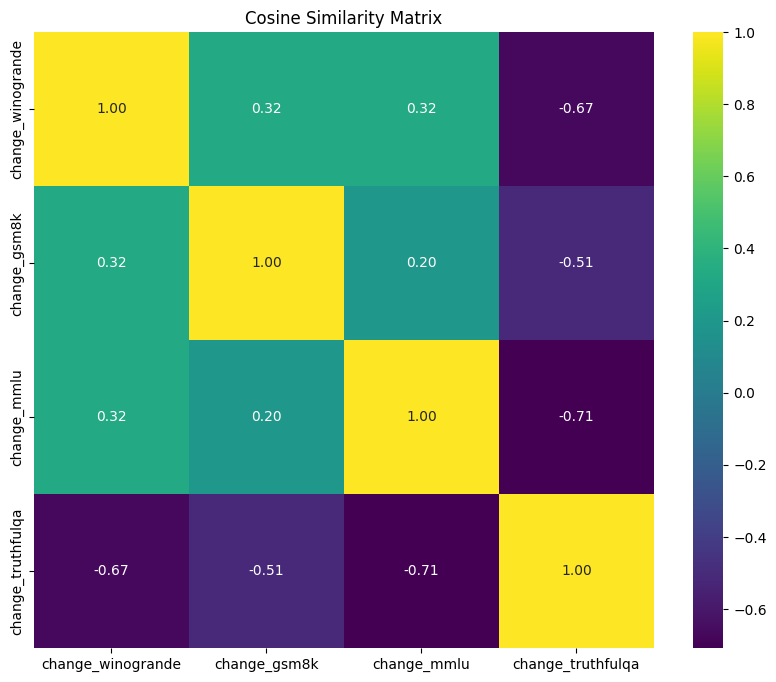

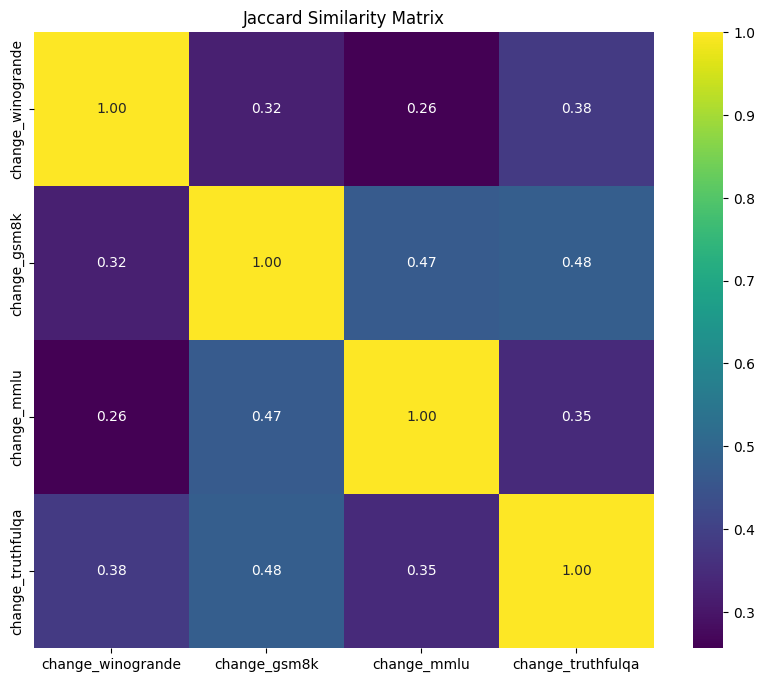

In [ ]:
# prompt: visualize two matrix and remove change_average

import matplotlib.pyplot as plt
import seaborn as sns

tasks_to_visualize = [task for task in task_names if task != "change_average"]

# Filter the cosine similarity matrix
cosine_matrix_filtered = cosine_matrix_df.loc[tasks_to_visualize, tasks_to_visualize]

# Visualize the Cosine Similarity Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_matrix_filtered.astype(float), annot=True, fmt=".2f", cmap="viridis")
plt.title("Cosine Similarity Matrix")
plt.show()


# Filter the Jaccard similarity matrix
jaccard_matrix_filtered = jaccard_matrix.loc[tasks_to_visualize, tasks_to_visualize]

# Visualize the Jaccard Similarity Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_matrix_filtered.astype(float), annot=True, fmt=".2f", cmap="viridis")
plt.title("Jaccard Similarity Matrix")
plt.show()


In [ ]:
import torch
from typing import Dict, Optional
from transformers import AutoModelForCausalLM
import logging
import re

logger = logging.getLogger(__name__)

def generate_task_mask(
    task_name: str,
    task_features_list: Dict[str, tuple],
    base_model_path: str,
    save_path: Optional[str] = None,
) -> Dict[str, torch.Tensor]:
    """
    Generate a boolean mask for a specific task based on selected parameter names.
    Supports split keys like 'model.layers.3.mlp.down_proj.weight[0]'.

    Returns:
        Dict[str, torch.Tensor]: Dictionary of boolean masks.
    """
    if task_name not in task_features_list:
        raise ValueError(f"Task '{task_name}' not found in task_features_list.")

    logger.info(f"Loading base model weights from: {base_model_path}")
    state_dict = AutoModelForCausalLM.from_pretrained(base_model_path).state_dict()

    selected_features, _ = task_features_list[task_name]
    selected_features_set = set(selected_features)

    logger.info(f"Generating mask for task: {task_name} using {len(selected_features_set)} selected features.")
    mask_dict: Dict[str, torch.Tensor] = {}
    split_map: Dict[str, list] = {}

    for name in selected_features_set:
        if "[" in name and name.endswith("]"):
            base_key, idx = re.match(r"^(.*)\[(\d+)\]$", name).groups()
            idx = int(idx)
            split_map.setdefault(base_key, []).append(idx)
        else:
            split_map.setdefault(name, None)

    num_masked_keys = 0
    num_total_true = 0

    for key, tensor in state_dict.items():
        if not isinstance(tensor, torch.Tensor):
            continue

        if key not in split_map:
            mask = torch.zeros_like(tensor, dtype=torch.bool)
        elif split_map[key] is None:
            mask = torch.ones_like(tensor, dtype=torch.bool)
            num_masked_keys += 1
            num_total_true += mask.numel()
        else:
            split_indices = split_map[key]
            mask = torch.zeros_like(tensor, dtype=torch.bool)
            chunks = torch.chunk(tensor, max(split_indices) + 1, dim=0)
            split_sizes = [c.shape[0] for c in chunks]
            offsets = [0] + list(torch.cumsum(torch.tensor(split_sizes[:-1]), dim=0))
            for idx in split_indices:
                start = offsets[idx]
                end = start + split_sizes[idx]
                mask[start:end] = True
                num_total_true += (end - start)
            num_masked_keys += 1

        mask_dict[key] = mask

    print(f"Masked keys (with any True): {num_masked_keys} out of {len(state_dict)} parameters")
    print(f"Total masked parameters (True values): {num_total_true}")

    if save_path:
        torch.save(mask_dict, save_path)
        logger.info(f"Task mask saved to: {save_path}")

    return mask_dict



In [ ]:
for task_name in task_names:
    mask = generate_task_mask(
    task_name=task_name,
    task_features_list=task_features_list,
    base_model_path="yedi-hu/slerp_llama_2_child-1-1-float16",
    save_path=f"{task_name}_mask"
  )


config.json:   0%|          | 0.00/698 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.59G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/183 [00:00<?, ?B/s]

Masked keys (with any True): 150 out of 291 parameters
Total masked parameters (True values): 416696


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Masked keys (with any True): 216 out of 291 parameters
Total masked parameters (True values): 846906


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Masked keys (with any True): 233 out of 291 parameters
Total masked parameters (True values): 853581


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Masked keys (with any True): 182 out of 291 parameters
Total masked parameters (True values): 585031


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Masked keys (with any True): 82 out of 291 parameters
Total masked parameters (True values): 200452


## Manual Mask Gen

In [ ]:
import torch
from scipy.stats import pearsonr

def flatten_dict_values(d):
    # Convert boolean tensors to float (True=1.0, False=0.0) and flatten
    return torch.cat([v.flatten().to(torch.float32) for v in d.values()])
dict1 = torch.load('mask_test')
dict2 = torch.load('truthfulqa_mask')

# Flatten all values
flat1 = flatten_dict_values(dict1)
flat2 = flatten_dict_values(dict2)

# Truncate to the shorter length
min_len = min(len(flat1), len(flat2))
flat1 = flat1[:min_len]
flat2 = flat2[:min_len]

# Compute Pearson correlation
correlation, _ = pearsonr(flat1.numpy(), flat2.numpy())
print("Correlation:", correlation)

Correlation: 0.15573627


In [ ]:
!generate_mask yedi-hu/Llama-2-7b-gsm8k-float16 \
yedi-hu/slerp_llama_2_child-1-6-float16 \
mask_test\
-p 0.5

Loading checkpoint shards: 100% 3/3 [00:03<00:00,  1.14s/it]
Loading checkpoint shards: 100% 3/3 [00:03<00:00,  1.14s/it]
Saving task mask to mask_test


## Merge

In [ ]:
!slerp_merge \
yedi-hu/slerp_llama_2_child-2-6-float16 \
yedi-hu/Llama-2-7b-truthfulqa-float16 \
./slerp_llama_2_child-3-2-float16-elastic-truthfulqa-mask-0.7\
-m change_truthfulqa_mask

config.json: 100% 698/698 [00:00<00:00, 5.58MB/s]
model.safetensors.index.json: 24.0kB [00:00, 84.5MB/s]
Fetching 3 files:   0% 0/3 [00:00<?, ?it/s]
model-00001-of-00003.safetensors:   0% 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0% 0.00/4.95G [00:00<?, ?B/s]
model-00001-of-00003.safetensors:   0% 10.5M/4.94G [00:00<00:52, 94.5MB/s]


model-00003-of-00003.safetensors:   0% 0.00/3.59G [00:00<?, ?B/s]
model-00001-of-00003.safetensors:   1% 31.5M/4.94G [00:00<00:31, 158MB/s] 

model-00002-of-00003.safetensors:   0% 10.5M/4.95G [00:00<01:16, 64.6MB/s]


model-00003-of-00003.safetensors:   0% 10.5M/3.59G [00:00<00:55, 64.4MB/s]
model-00001-of-00003.safetensors:   1% 62.9M/4.94G [00:00<00:24, 201MB/s]


model-00003-of-00003.safetensors:   1% 21.0M/3.59G [00:00<00:48, 73.1MB/s]

model-00002-of-00003.safetensors:   1% 31.5M/4.95G [00:00<00:55, 88.0MB/s]
model-00001-of-00003.safetensors:   2% 94.4M/4.94G [00:00<00:21, 224MB/s]
model-00001-of-00003.safetensors:   3% 126M/4.

In [ ]:
!slerp_merge \
yedi-hu/slerp_llama_2_child-2-6-float16 \
yedi-hu/Llama-2-7b-truthfulqa-float16 \
./slerp_llama_2_child-3-2-float16-elastic-gsm8k-mask-0.7\
-m change_gsm8k_mask

Loading checkpoint shards: 100% 3/3 [00:33<00:00, 11.21s/it]
Loading checkpoint shards: 100% 3/3 [00:34<00:00, 11.35s/it]
model.embed_tokens.weight: Applied SLERP to 100.00% of parameters
model.layers.0.self_attn.q_proj.weight: Applied SLERP to 79.98% of parameters
model.layers.0.self_attn.k_proj.weight: Applied SLERP to 100.00% of parameters
model.layers.0.self_attn.v_proj.weight: Applied SLERP to 100.00% of parameters
model.layers.0.self_attn.o_proj.weight: Applied SLERP to 100.00% of parameters
model.layers.0.mlp.gate_proj.weight: Applied SLERP to 0.00% of parameters
model.layers.0.mlp.up_proj.weight: Applied SLERP to 0.00% of parameters
model.layers.0.mlp.down_proj.weight: Applied SLERP to 100.00% of parameters
model.layers.0.input_layernorm.weight: Applied SLERP to 89.99% of parameters
model.layers.0.post_attention_layernorm.weight: Applied SLERP to 77.73% of parameters
model.layers.1.self_attn.q_proj.weight: Applied SLERP to 89.99% of parameters
model.layers.1.self_attn.k_proj.we

In [ ]:
from huggingface_hub import HfApi
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = 'slerp_llama_2_child-3-2-float16-elastic-truthfulqa-mask-0.7' # @param {"type":"string"}
repo_name=f'yedi-hu/{model_name}'
model_path=f'./{model_name}'
token='yours'

api = HfApi()

try:
    api.create_repo(
        repo_id=repo_name,
        private=False,
        exist_ok=True
      )
except Exception as e:
      raise Exception(f"Failed to create repository: {str(e)}")

print(f"Uploading model to {repo_name}...")

  # Load the model and tokenizer
# model = AutoModelForCausalLM.from_pretrained(model_path)
# tokenizer = AutoTokenizer.from_pretrained(model_path)

api.upload_folder(
    folder_path=model_path,
    repo_id=repo_name,
    repo_type="model",
    commit_message="Upload model files",
)


print(f"✅ Model successfully uploaded to: https://huggingface.co/{repo_name}")

Uploading model to yedi-hu/slerp_llama_2_child-3-2-float16-elastic-truthfulqa-mask-0.7...


model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.59G [00:00<?, ?B/s]

✅ Model successfully uploaded to: https://huggingface.co/yedi-hu/slerp_llama_2_child-3-2-float16-elastic-truthfulqa-mask-0.7


In [ ]:
from huggingface_hub import HfApi
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = 'slerp_llama_2_child-3-2-float16-elastic-gsm8k-mask-0.7' # @param {"type":"string"}
repo_name=f'yedi-hu/{model_name}'
model_path=f'./{model_name}'
token='yours'

api = HfApi()

try:
    api.create_repo(
        repo_id=repo_name,
        private=False,
        exist_ok=True
      )
except Exception as e:
      raise Exception(f"Failed to create repository: {str(e)}")

print(f"Uploading model to {repo_name}...")

  # Load the model and tokenizer
# model = AutoModelForCausalLM.from_pretrained(model_path)
# tokenizer = AutoTokenizer.from_pretrained(model_path)

api.upload_folder(
    folder_path=model_path,
    repo_id=repo_name,
    repo_type="model",
    commit_message="Upload model files",
)


print(f"✅ Model successfully uploaded to: https://huggingface.co/{repo_name}")

Uploading model to yedi-hu/slerp_llama_2_child-3-2-float16-elastic-gsm8k-mask-0.7...


model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.59G [00:00<?, ?B/s]

✅ Model successfully uploaded to: https://huggingface.co/yedi-hu/slerp_llama_2_child-3-2-float16-elastic-gsm8k-mask-0.7


## Replace

In [ ]:
Replace_name = 'replace_llama_2_child-3-2-float16-elastic-truthfulqa-mask-0.7' # @param {"type":"string"}
cli = f'replace_merge \
yedi-hu/slerp_llama_2_child-2-6-float16 \
yedi-hu/Llama-2-7b-truthfulqa-float16 \
change_truthfulqa_mask \
{Replace_name}'
!{cli}

Loading checkpoint shards: 100% 3/3 [00:33<00:00, 11.19s/it]
Loading checkpoint shards: 100% 3/3 [00:33<00:00, 11.16s/it]
Loading checkpoint shards: 100% 3/3 [00:33<00:00, 11.18s/it]
Successfully replaced masked areas, saved to: replace_llama_2_child-3-2-float16-elastic-gsm8k-mask-0.7


## Update

In [ ]:
from huggingface_hub import HfApi
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = 'replace_llama_2_child-3-2-float16-elastic-gsm8k-mask-0.7' # @param {"type":"string"}
repo_name=f'yedi-hu/{model_name}'
model_path=f'./{model_name}'
token='yours'

api = HfApi()

try:
    api.create_repo(
        repo_id=repo_name,
        private=False,
        exist_ok=True
      )
except Exception as e:
      raise Exception(f"Failed to create repository: {str(e)}")

print(f"Uploading model to {repo_name}...")

  # Load the model and tokenizer
# model = AutoModelForCausalLM.from_pretrained(model_path)
# tokenizer = AutoTokenizer.from_pretrained(model_path)

api.upload_folder(
    folder_path=model_path,
    repo_id=repo_name,
    repo_type="model",
    commit_message="Upload model files",
)


print(f"✅ Model successfully uploaded to: https://huggingface.co/{repo_name}")

Uploading model to yedi-hu/replace_llama_2_child-3-2-float16-elastic-gsm8k-mask-0.7...


model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.59G [00:00<?, ?B/s]

✅ Model successfully uploaded to: https://huggingface.co/yedi-hu/replace_llama_2_child-3-2-float16-elastic-gsm8k-mask-0.7


In [ ]:
user = 'yedi-hu/'
repo_name = user+'task_masks'
output_path = './task_masks/'
try:
  api.create_repo(
      repo_id=repo_name,
      private=False,
      exist_ok=True
    )
except Exception as e:
    raise Exception(f"Failed to create repository: {str(e)}")

print(f"Uploading model to {repo_name}...")


api.upload_folder(
    folder_path=output_path,
    repo_id=repo_name,
    repo_type="model",
    commit_message="Upload model files",
)